In [1]:
import matplotlib.pyplot as plt

In [10]:
titles = "1NN/A	1NN/T	5NN/A	5NN/T	NSW-P/A	NSW-P/T	HNSWP/A	HNSWP/T	NSW5/A	NSW5/T	NSW9/A	NSW9/T	NSW11/A	NSW11/T	W NSW5/A	W NSW5/T	W NSW9/A	W NSW9/T	W NSW11/A	W NSW11/T".split('\t')
ticks = [4, 8, 16, 32,     128]


# SUSY

In [13]:
S_4 = [71.7416, 78.161, 76.836, 87.8178, 62.74, 22.4054, 69.0164, 15.0063, 69.8628, 113.852, 72.7212, 203.632, 73.3764, 248.159, 71.0516, 114.449, 73.7424, 204.875, 74.4488, 254.057]
S_8 = [71.8668, 89.4953, 77.1312, 99.1051, 69.1856, 49.4309, 70.5768, 21.4322, 73.3744, 245.015, 74.4076, 434.106, 74.704, 525.73, 73.0364, 245.637, 73.782, 441.05, 74, 528.59]
S_16 = [71.8652, 114.03, 77.1984, 132.533, 70.696, 85.7236, 70.7932, 27.6005, 72.8808, 389.896, 73.2712, 739.355, 73.3988, 825.344, 72.5908, 411.298, 72.798, 796.163, 72.8172, 848.021]
S_32 = [71.8636, 169.764, 77.1604, 145.42, 71.002, 110.018, 70.608, 31.7596, 72.7052, 526.812, 72.9308, 944.803, 73.0288, 1150.91, 72.3896, 533.397, 72.5404, 947.878, 72.5472, 1154.72]

S_128 = [71.8628, 8537.76, 77.1768, 8891.26, 71.1176, 7270.9, 70.0972, 57.6572, 72.6292, 21759.7, 72.8776, 52858.7, 72.8956, 57389.7, 72.3476, 29056.3, 72.4408, 49089.6]


S_4M = dict(zip(titles, S_4))
S_8M = dict(zip(titles, S_8))
S_16M = dict(zip(titles, S_16))
S_32M = dict(zip(titles, S_32))

S_128M = dict(zip(titles, S_128))

S_DICT = [S_4M, S_8M, S_16M, S_32M,        S_128M]

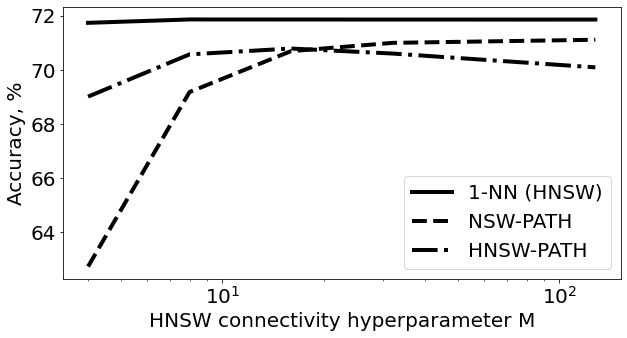

In [64]:
plt.figure(figsize=(10, 5))
plt.plot(ticks, [row['1NN/A'] for row in S_DICT],  c='k', ls='-', lw=4,      label="1-NN (HNSW)")
# plt.plot(ticks, [row['5NN/A'] for row in S_DICT],  c='k', ls=':',         label="5-NN (HNSW)")
plt.plot(ticks, [row['NSW-P/A'] for row in S_DICT], c='k',ls='--', lw=4,        label="NSW-PATH")
plt.plot(ticks, [row['HNSWP/A'] for row in S_DICT], c='k',ls='-.', lw=4,        label="HNSW-PATH")

plt.xticks(ticks, fontsize=20)
plt.ylabel('Accuracy, %', fontsize=20)
plt.xlabel('HNSW connectivity hyperparameter M', fontsize=20)
plt.yticks(fontsize=20)
plt.xscale('log')

plt.legend(fontsize=20)
plt.show()

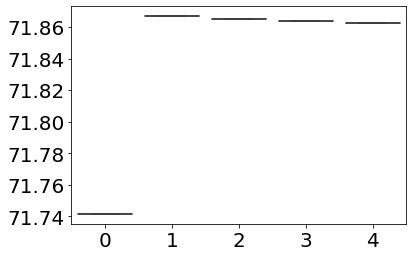

In [61]:
import seaborn as sns
import pandas as pd

data = pd.DataFrame([[row['1NN/A'] for row in S_DICT]])
sns.boxplot(data=data)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()


In [65]:
%run -i ../test-stat.py

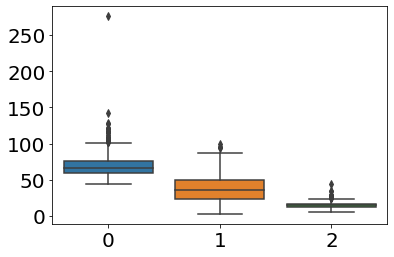

In [78]:
data = pd.DataFrame([knn_times[:500], nsw_times[:500], hnsw_times[:500]]).transpose()

sns.boxplot(data=data)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()